> (Última Actualización: 23 de Septiembre de 2025)

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.

# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

Recordemos que estamos estudiando **sistemas dinámicos**, con reglas representadas por **ecuaciones diferenciales ordinarias (ODEs)**. En el caso 2D, vamos a tener conjuntos de pares de ecuaciones que describen la evolución temporal de dos variables.

Podemos ver directamente como encontrar **soluciones al problema de valor inicial en 2D** usando métodos de **integración numérica** 2D, que van a ser trayectorias en el diagrama de fases. Además vimos que podemos entender mejor el sistema mediante la aplicación de diversas **herramientas gráficas**. Esto nos permitió estudiar distintos tipos de puntos fijos de acuerdo a como condicionan el flujo en el espacio de fases.

En este Colab, vamos a aplicar las herramientas aprendidas para el estudio del flujo bidimensional, pero en este caso para incorporar nuevos elementos dinámicos relevantes, los cuales no podían aparecer para sistemas unidimensionales. Se trata de los **ciclos límite**.

$$
x(t_0+\tau) = x(t_0) \neq x(t), \forall t
$$

---
# Ciclos límite

Definimos como ciclo límite a una órbita periódica aislada.

<center>
<img src="https://lh4.googleusercontent.com/proxy/6-fL6oliiEmpNnrSdFa-LeWroIvfU2Krb1kBFhLJSIWSHyzxEREfd3vSlRl8dMmoPoVuARg0gq_Q3vvdKM8ZbYuj863JixheDuYMtzdJEg" width="500"/>
</center>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

---
## Ejercicio 1

Sea el sistema descrito por el siguiente conjunto de ecuaciones

$$
\dot{x} = y\\
\dot{y} = -x
$$

Encuentre la solución para condiciones iniciales [1, 0]. Es periódica? Si así lo pareciera, busque el período de la solución. Para esto se propone encontrar los picos de la señal con `scipy.signal.find_peaks`, encontrar la distancia entre esos picos con `numpy.diff`, y ver si la solución muestra una periodicidad definida. Puedo decir que se trata de un ciclo límite? Justifique usando las herramientas vistas.



In [2]:
def ecuaciones(x, y, params=[]):
    x_dot = y
    y_dot = -x
    return x_dot, y_dot

def integrar_ecuaciones(total_time, dt, X0, params=[]):
    num_steps = int(np.divide(total_time, dt))
    xs = np.empty(num_steps)
    ys = np.empty(num_steps)
    xs[0], ys[0] = X0
    x_dot = np.empty(num_steps)
    y_dot = np.empty(num_steps)
    x_dot[0], y_dot[0] = ecuaciones(xs[0], ys[0], params)
    for i in range(num_steps-1):
        xs[i+1] = xs[i] + x_dot[i]*dt
        ys[i+1] = ys[i] + y_dot[i]*dt
        x_dot[i+1], y_dot[i+1] = ecuaciones(xs[i+1], ys[i+1], params)
    return xs, ys, num_steps

In [3]:
ci = [1, 0]

T = 25
dt = .01

x, y, num_steps = integrar_ecuaciones(T, dt, ci)
t = np.arange(0, T, step=dt)

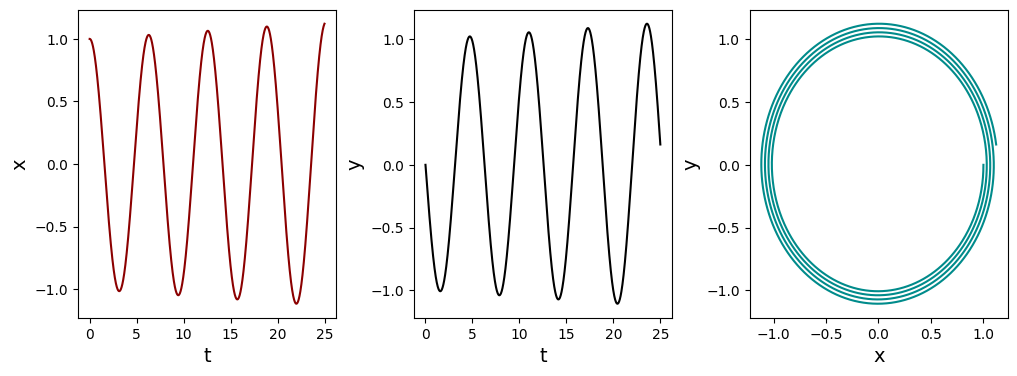

In [4]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(t, x, 'darkred')
plt.xlabel('t', fontsize=14)
plt.ylabel('x', fontsize=14)

plt.subplot(132)
plt.plot(t, y, 'k')
plt.xlabel('t', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(133)
plt.plot(x, y, 'darkcyan')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()

In [7]:
#Para x
x_peaks = sp.signal.find_peaks(x)
print('Para x:', *np.diff(t[x_peaks[0]]))

#Para y
y_peaks = sp.signal.find_peaks(y)
print('Para y:', *np.diff(t[y_peaks[0]]))

Para x: 6.28 6.289999999999999
Para y: 6.28 6.280000000000001 6.289999999999999


---
## Ejercicio 2

Sea el sistema descrito por el siguiente conjunto de ecuaciones

$$
\dot{x} = y(1+\epsilon x)\\
\dot{y} = -x(1+\epsilon x)
$$

2.1. Para alguna condición inicial particular, integre las ecuaciones.

2.2. Estime el período.

2.3. Ahora vuelva a integrar definiendo como tiempo de integración un único período completo. Considere usar un paso grande, para tener un muestreo bastante discreto de las soluciones y grafique los puntos de la solución en lugar de líneas sólidas. Compare con las soluciones del ejercicio anterior. Qué encuentra de diferente?

2.4. Transforme las soluciones encontradas a coordenadas polares usando:

$$
\rho = \sqrt{x^2+y^2}\\
\phi = arctan \left(\frac{y}{x} \right)
$$

Qué puede decir del problema y de su comparación con el ejercicio anterior desde esta perspectiva?


In [ ]:
# # # COMPLETAR

---
## Ejercicio 3

La ecuación del [oscilador de Van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) está dada por

$$
\ddot{x} - \mu(1 - x^2)\dot{x} + x = 0
$$

3.1. Escriba una función llamada `van_der_pol` para esta ecuación expresada como un sistema dinámico.

3.2. Integre con `solve_ivp` para $\mu=2$ con condiciones iniciales $x=1$ y $\dot{x}=0$, dandole suficiente tiempo a la solución según considere.

3.3. Grafique el diagrama de fases ($x$, $\dot{x}$) de la solución con puntos en lugar de con líneas sólidas (incluya el punto de la condición inicial de manera distintiva). Qué puede observar en referencia a la distancia entre puntos? A qué se lo atribuye?


In [ ]:
# # # COMPLETAR

---
## Ejercicio 4

Sea el siguiente sistema visto en clase

$$
\dot{\rho} = \rho(1-\rho)\\
\dot{\phi} = \omega + sin(\phi)
$$

4.1. Integre el sistema para w=1 usando distintas condiciones iniciales con $\rho$ entre 0 y 2, y $\phi_{inicial}=0$. Vea la evolución temporal de $\rho$.

4.2. Integre el sistema para w igual a -1, 0, y 1 usando como condiciones iniciales $\rho_{inicial}=1$ y $\phi_{inicial}=0$. Vea la evolución temporal de $\phi$. Cómo interpreta lo que está pasando?

4.3. Integre el sistema para w=1, usando como condiciones iniciales $\rho_{inicial}=1$ y $\phi_{inicial}=0$. Haga la transformación a coordenadas cartesianas usando las expresiones

$$
x = \rho.cos(\phi)\\
y = \rho.sin(\phi)
$$

Grafique en el diagrama de fases ($x$, $y$), pero usando puntos en lugar de una línea sólida. Qué observa? Estudie el flujo del campo vector para entender mejor lo que está pasando.

Para eso, genere una grilla en ($x$,$y$). Transformela a coordenadas polares usando la expresión

$$
\rho = \sqrt{x^2+y^2}\\
\phi = arctan \left(\frac{y}{x} \right)
$$

Calcule los valores del campo vector sin integrar en coordenadas polares y transforme esas velocidades a coordenadas cartesianas

$$
\dot{x} = \dot{\rho} \cos(\phi) - \rho \dot{\phi} \sin(\phi)\\
\dot{y} = \dot{\rho} \sin(\phi) + \rho \dot{\phi} \cos(\phi)
$$

Grafique usando `quiver`.


In [ ]:
# # # COMPLETAR

---
## Ejercicio 5

Sea el sistema para la bifurcación de Hopf

$$
\dot{x} = \mu x + y\\
\dot{y} = -x + \mu y - x^2 y
$$

5.1. Integre el sistema con `solve_ivp` hasta un tiempo de 10, con paso temporal $dt=0.1$, condiciones iniciales $x=0$ y $y=0$, para para valores de $\mu=[-1, -0.5, 0, 0.5, 1]$. Calcule el radio como $r=\sqrt{x^2+y^2}$ y muestre las soluciones de $r$ para los distintos $\mu$ en un mismo gráfico. Qué muestran las observaciones sobre la evolución temporal en este punto?

5.2. Pruebe ahora de hacer lo mismo pero con condiciones iniciales $x=0.1$ y $y=0.1$ (puede demorar un minuto). Qué observa en relación al item anterior?

5.3. Estudie la bifurcación de este sistema. Cómo son las oscilaciones que se "prenden"?


In [ ]:
# # # COMPLETAR